# Telco Customer Churn Analysis
## Data Wrangling

my data cleaning workflow/steps/guide: https://vlzjc.github.io/p/data-cleaning/

In [1]:
#imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Read the data
df = pd.read_csv('data.csv')

In [3]:
# Basic info
print('Dataset Shape:', df.shape)
print('\
Basic Statistics for Numerical Columns:')
print(df[['tenure', 'MonthlyCharges', 'TotalCharges']].describe())

Dataset Shape: (7043, 21)
Basic Statistics for Numerical Columns:
            tenure  MonthlyCharges
count  7043.000000     7043.000000
mean     32.371149       64.761692
std      24.559481       30.090047
min       0.000000       18.250000
25%       9.000000       35.500000
50%      29.000000       70.350000
75%      55.000000       89.850000
max      72.000000      118.750000


In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

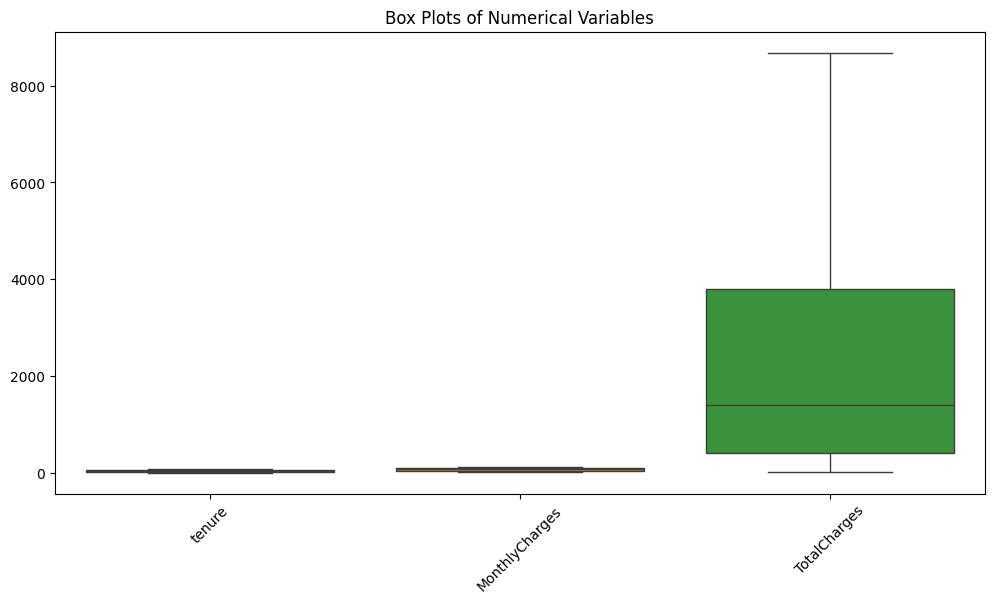

tenure:
Number of outliers: 0
Lower bound: -60.00
Upper bound: 124.00
Min value: 0.00
Max value: 72.00
MonthlyCharges:
Number of outliers: 0
Lower bound: -46.02
Upper bound: 171.38
Min value: 18.25
Max value: 118.75
TotalCharges:
Number of outliers: 0
Lower bound: -4688.48
Upper bound: 8884.67
Min value: 18.80
Max value: 8684.80


In [8]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Calculate outliers using IQR method
def find_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return len(outliers), lower_bound, upper_bound

numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Create box plots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_cols])
plt.title('Box Plots of Numerical Variables')
plt.xticks(rotation=45)
plt.show()

# Print outlier statistics
for col in numerical_cols:
    n_outliers, lower, upper = find_outliers(df, col)
    print(f"\
{col}:")
    print(f"Number of outliers: {n_outliers}")
    print(f"Lower bound: {lower:.2f}")
    print(f"Upper bound: {upper:.2f}")
    print(f"Min value: {df[col].min():.2f}")
    print(f"Max value: {df[col].max():.2f}")

There are no statistical outliers in any of the numerical variables (tenure, MonthlyCharges, TotalCharges)
when using the standard IQR method.
All values fall within expected ranges for a telecom business.

In [9]:
# Clean categorical features (example - adapt for all relevant columns)
for col in ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']:
    if df[col].dtype == 'object': # Only clean string columns
        df[col] = df[col].str.strip().str.lower()

In [10]:
df['Churn Bool'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [11]:
# Check data types
print(df.dtypes)

# Remove duplicates
df.drop_duplicates(inplace=True)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
Churn Bool            int64
dtype: object
